In [249]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import utils

import importlib
importlib.reload(utils)

<module 'utils' from '/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/utils.py'>

# Read Data

In [250]:
in_dir = 'data-2018-01-19-multi-evidence-show-flights'

raw_data = pd.read_csv('./data/' + in_dir + '/info.csv')

data,fails = utils.parse_data(raw_data)

In [251]:
data = data[data['net'] > 3]

# Analyze Evidence

In [252]:
last_perfs = []
last_pops = []
pops = []
evidences = []
net_evidences = []
final_pops = []


for net in sorted(set(data['net'])):
    
    evidence, net_evidence = utils.get_evidence(fails[net])

    print('Net', net)
    print(evidence[:(max(data['turn'])-1)])
    print(np.array(net_evidence[:(max(data['turn'])-1)] * 100,dtype=int)/100.0)
    
    for t in sorted(set(data['turn'])):

        if t > 1:
            last_perfs += list(evidence[t-2])
            last_pops += list(mean_pop)
        
        if t > 0:    
            mean_pop = utils.get_pop(data,net,t)
            print(mean_pop)
            
        if t > 1:
            pops += list(mean_pop)

    print('Final correlation with last evidence', np.corrcoef(evidence[t-2],mean_pop)[0,1])
    print('Final correlation with total evidence', np.corrcoef(net_evidence[t-2],mean_pop)[0,1])

    evidences += list(evidence[t-2])
    net_evidences += list(net_evidence[t-2])
    final_pops += list(mean_pop)


Net 4
[[ 0.75  1.    0.5   0.5   0.5   0.5   0.5   0.75]
 [ 1.    1.    0.5   0.5   0.5   0.5   0.75  0.75]
 [ 0.75  0.25  0.25  0.75  0.5   0.75  0.75  1.  ]]
[[ 0.75  1.    0.5   0.5   0.5   0.5   0.5   0.75]
 [ 0.87  1.    0.5   0.5   0.5   0.5   0.62  0.75]
 [ 0.83  0.75  0.41  0.58  0.5   0.58  0.66  0.83]]
[ 0.25  0.5   0.5   0.25  0.5   0.25  0.5   0.5 ]
[ 0.25  0.5   0.5   0.5   0.5   0.    0.75  0.75]
[ 0.5   0.75  0.5   0.75  1.    0.5   0.75  1.  ]
[ 0.75  0.25  0.25  1.    0.5   0.75  1.    0.75]
Final correlation with last evidence 0.843815925695
Final correlation with total evidence 0.278988593075
Net 5
[[ 0.75  0.5   0.5   0.5   0.25  0.75  0.75  0.25]
 [ 0.5   0.    0.5   0.75  0.5   0.5   0.25  0.75]
 [ 0.75  0.5   0.25  0.75  0.25  0.5   0.75  0.5 ]]
[[ 0.75  0.5   0.5   0.5   0.25  0.75  0.75  0.25]
 [ 0.62  0.25  0.5   0.62  0.37  0.62  0.5   0.5 ]
 [ 0.66  0.33  0.41  0.66  0.33  0.58  0.58  0.5 ]]
[ 0.25  0.5   0.25  0.    0.25  0.5   0.25  0.25]
[ 0.5   0.75  0.2

/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/utils.py:78: FutureWarning: pd.rolling_sum is deprecated for ndarrays and will be removed in a future version
  net_evidence =  pd.rolling_sum(evidence, len(this_fails), 1)


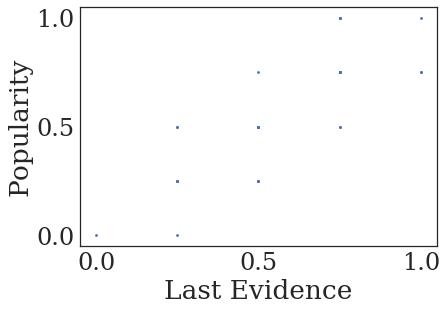

In [253]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
plt.plot(evidences,final_pops,'.')
plt.xlabel('Last Evidence')
plt.ylabel('Popularity')
#plt.savefig('choice-evidence.jpg', bbox_inches = 'tight')

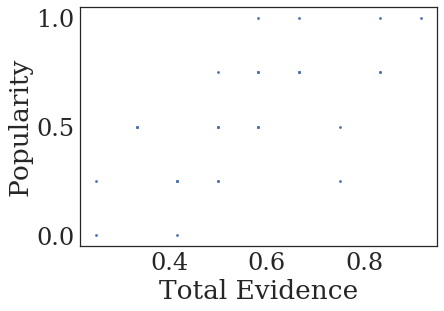

In [254]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
plt.plot(net_evidences,final_pops,'.')
plt.xlabel('Total Evidence')
plt.ylabel('Popularity')
#plt.savefig('choice-evidence.jpg', bbox_inches = 'tight')

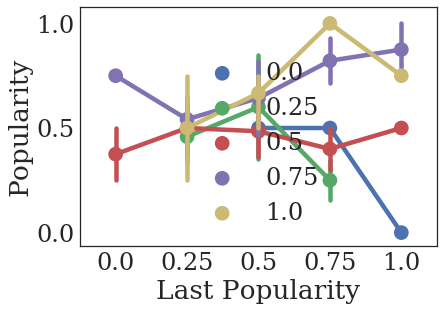

In [255]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
sns.pointplot(last_pops,pops,last_perfs)
plt.xlabel('Last Popularity')
plt.ylabel('Popularity')
#plt.savefig('choice-evidence.jpg', bbox_inches = 'tight')

In [256]:
np.array(pops)[np.array(last_pops) == 0]

array([ 0.5 ,  0.25,  0.75])

# Analyze Reward

In [257]:
rewards = []

for net in sorted(set(data['net'])):
    
    rewards += [[]]
    for t in sorted(set(data['turn'])):

        if t > 0:
            rewards[-1] += [utils.get_reward(data,fails,net,t)]

rewards = np.transpose(np.array(rewards))

[ 0.25  0.5   0.5   0.25  0.5   0.25  0.5   0.5 ] [ 2.  4.  0.  0.  0.  0.  0.  2.]
[ 0.25  0.5   0.5   0.5   0.5   0.    0.75  0.75] [ 2.  4.  0.  0.  0.  0.  0.  2.] [ 4.  4.  0.  0.  0.  0.  2.  2.]
[ 0.5   0.75  0.5   0.75  1.    0.5   0.75  1.  ] [ 4.  4.  0.  0.  0.  0.  2.  2.] [ 2. -2. -2.  2.  0.  2.  2.  4.]
[ 0.75  0.25  0.25  1.    0.5   0.75  1.    0.75] [ 2. -2. -2.  2.  0.  2.  2.  4.] [ 4.  0.  0.  0.  2.  4.  0.  0.]
[ 0.25  0.5   0.25  0.    0.25  0.5   0.25  0.25] [ 2.  0.  0.  0. -2.  2.  2. -2.]
[ 0.5   0.75  0.25  0.25  0.5   0.25  0.75  0.25] [ 2.  0.  0.  0. -2.  2.  2. -2.] [ 0. -4.  0.  2.  0.  0. -2.  2.]
[ 0.25  0.5   0.75  0.75  0.25  0.75  0.25  0.75] [ 0. -4.  0.  2.  0.  0. -2.  2.] [ 2.  0. -2.  2. -2.  0.  2.  0.]
[ 0.75  0.5   0.    0.75  0.5   0.5   0.5   0.25] [ 2.  0. -2.  2. -2.  0.  2.  0.] [ 0.  0. -2.  0. -2.  2.  0.  0.]
[ 0.75  0.75  0.25  0.75  0.25  0.75  0.25  0.25] [ 2.  2.  0. -2.  0. -2. -2.  2.]
[ 0.5   0.75  0.5   0.5   0.5   0.25  0.

In [258]:
print('Average reward each turn:', np.mean(rewards,1))

Average reward each turn: [ 0.0625    0.203125  0.28125   0.390625]


In [259]:

turn = []
seen = []
perf = []
choice = []

for i,row in data.iterrows():
    
    if len(row['viewed']) > 0:
        
        print('----')
        print(row['net'],row['turn'])
        print(row['viewed'])
        print(fails[row['net']][row['turn']-2])
        print(row['action'])
        
        for j in range(len(row['action'])):
            
            these_successes = sum(np.array(fails[row['net']][row['turn']-2][j]) == 'success')
            these_fails = sum(np.array(fails[row['net']][row['turn']-2][j]) == 'fail')
            
            turn += [row['turn']]
            seen += [row['viewed'][j][0] != '0']
            perf += [these_successes - these_fails]
            choice += [row['action'][j]]
            
indiv_choices = pd.DataFrame({'turn':turn,'seen':seen,'perf':perf,'choice':choice})

----
5 1
[['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0']]
[['fail', 'success', 'success', 'success'], ['fail', 'success', 'fail', 'success'], ['fail', 'success', 'fail', 'fail'], ['fail', 'success', 'success', 'success'], ['fail', 'fail', 'success', 'success'], ['success', 'success', 'fail', 'success'], ['fail', 'success', 'success', 'fail'], ['success', 'success', 'success', 'fail']]
[0, 1, 1, 0, 1, 0, 1, 0]
----
4 1
[['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0']]
[['fail', 'success', 'fail', 'fail'], ['success', 'fail', 'success', 'fail'], ['fail', 'fail', 'success', 'fail'], ['fail', 'success', 'fail', 'success'], ['fail', 'success', 'fail', 'success'], ['success', 'success', 'success', 'success'], ['fail', 'success', 'fail', 'suc

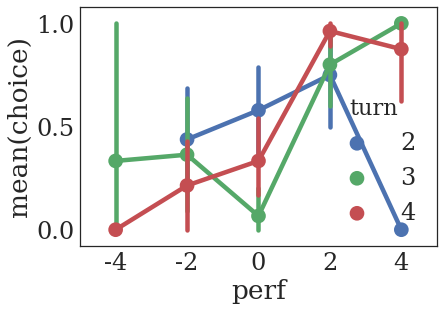

In [260]:
sns.pointplot('perf', 'choice', 'turn', data = indiv_choices[seen])

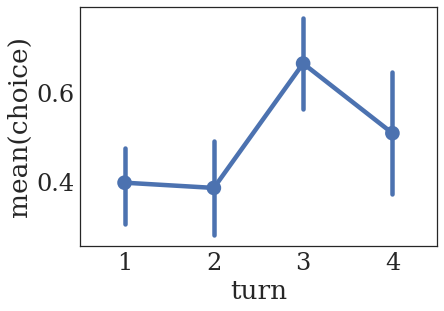

In [261]:
sns.pointplot('turn', 'choice', data = indiv_choices[~np.array(seen)])

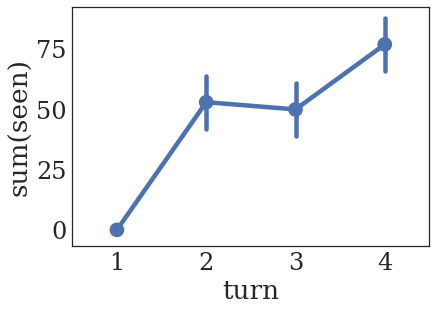

In [262]:
sns.pointplot('turn', 'seen', data = indiv_choices, estimator = sum)